In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [2]:
os.getcwd()

'/Users/yingchen/Documents2/CASA/urban_simulation/practical/wk7/Week_7_final'

In [3]:
os.chdir("./underground")
g_shp=nx.read_shp('underground.shp',geom_attrs=False) 

In [4]:
# original *undirected* network
g_shp=nx.read_shp('underground.shp',geom_attrs=False) 

nod_st1={(e1):weight for e1, e2, weight in g_shp.edges(data='station_1_')}
nod_st2={(e2):weight for e1, e2, weight in g_shp.edges(data='station_2_')}
nod_all = {**nod_st1, **nod_st2}
nx.set_node_attributes(g_shp,nod_all,'station')

g_shp_un = g_shp.to_undirected()

In [5]:
print(nx.info(g_shp_un))

Name: 
Type: Graph
Number of nodes: 306
Number of edges: 353
Average degree:   2.3072


## Explore the network

In [6]:
# 1. maximum distance between stations
max_edge=max(dict(g_shp_un.edges).items(), key=lambda x: x[1]['distance'])
max_edge

(((-0.1803, 51.5472), (-0.2795, 51.5635)),
 {'toid_seq': '240',
  'station_1': 94,
  'station_1_': 'Finchley Road',
  'station_2': 282,
  'station_2_': 'Wembley Park',
  'distance': 7115.148277461,
  'ShpName': 'underground'})

In [7]:
# 2. stations directly connected to *any known* station
Baker = [(d['station_1_'],d['station_2_']) for  u,v,d in g_shp_un.edges(data=True) 
         if "Baker" in d['station_1_'] or "Baker" in d['station_2_']]
Baker

[('Baker Street', 'Marylebone'),
 ('Baker Street', "Regent's Park"),
 ('Baker Street', 'Edgware Road (C)'),
 ('Baker Street', 'Great Portland Street'),
 ('Baker Street', 'Bond Street'),
 ('Baker Street', "St. John's Wood"),
 ('Baker Street', 'Finchley Road')]

In [8]:
# 3. edges directly connected to *any known* station
Baker = [(u,v,d) for  u,v,d in g_shp_un.edges(data=True) 
         if "Baker" in d['station_1_'] or "Baker" in d['station_2_']]
#Baker

In [9]:
# 4. unweighted diameter
nx.diameter(g_shp_un)

38

In [10]:
# 5. weighted (distance) diameter
nlen = {n:nx.single_source_dijkstra_path_length(g_shp_un, n, weight='distance') 
        for n in g_shp_un.nodes() }
e = nx.eccentricity(g_shp_un,sp=nlen)
d = nx.diameter(g_shp_un, e)
d

71491.11880904001

### Betweenness centrality (weighted)

In [11]:
### Weighted betweenness centrality:

#Let us compute the betweenness centrality for the network, considering the distance between stations:
bet_london_w=nx.betweenness_centrality(g_shp_un, weight='distance', normalized=False)
# We can add these values to the nodes attributes:
nx.set_node_attributes(g_shp_un,bet_london_w,'betweenness_w')

BC=pd.DataFrame.from_dict(bet_london_w,columns=['betweenness_w'],orient='index')
BC.sort_values(by=['betweenness_w'],ascending=False)[:20]

,betweenness_w
"(-0.1571, 51.5226)",13194.0
"(-0.0886, 51.5133)",11605.0
"(-0.1415, 51.515)",10847.0
"(-0.1238, 51.5308)",10794.0
"(-0.1494, 51.5142)",9597.0
"(-0.0612, 51.5194)",9500.0
"(-0.0726, 51.5154)",9334.0
"(-0.1973, 51.492)",9201.0
"(-0.0823, 51.5178)",9195.0
"(-0.047, 51.5221)",8652.0


In [12]:
# the top 10 stations with the maximum betweenness centrality values
maxbet10=BC.sort_values(by=['betweenness_w'],ascending=False)[:10]
maxbet10 = maxbet10.index.tolist()
for i in maxbet10:
    print(g_shp_un.nodes[i]['station'])

Baker Street
Bank
Oxford Circus
King's Cross St. Pancras
Bond Street
Whitechapel
Aldgate East
Earl's Court
Liverpool Street
Stepney Green


In [13]:
l1=list(g_shp_un.nodes)
len(l1)

306

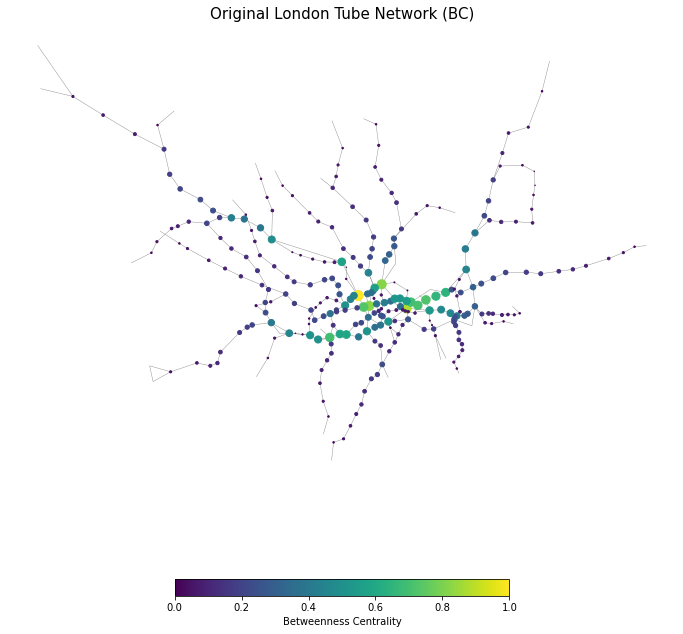

<Figure size 432x288 with 0 Axes>

In [14]:
# original betweenness centrality 
betweenness_w_values=[(i[1]['betweenness_w']) for i in g_shp_un.nodes(data=True)]

bet_w_color=[(i[1]['betweenness_w']/max(betweenness_w_values)) for i in g_shp_un.nodes(data=True)]
bet_w_size=[(i[1]['betweenness_w']/max(betweenness_w_values)*100) for i in g_shp_un.nodes(data=True)]


# Plot graph
pos_shp = {xy: xy for xy in g_shp.nodes()}
pos=pos_shp

fig, ax = plt.subplots(figsize=(12,12))


nx.draw_networkx_edges(g_shp_un, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(g_shp_un,
        pos = pos,
        node_color= bet_w_color,
        node_size= bet_w_size)

plt.colorbar(nod,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("Original London Tube Network (BC)",fontsize=15)

fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('p1_bc_nonsq.png', dpi=100)

### non-sequential removel 

In [15]:
g_shp_un.remove_nodes_from(maxbet10)

In [16]:
# Existing nodes:
l2=list(g_shp_un.nodes)
len(l2)

296

In [17]:
# to check which is the one missing:
list(set(l1) - set(l2))

[(-0.0726, 51.5154),
 (-0.1571, 51.5226),
 (-0.1973, 51.492),
 (-0.0886, 51.5133),
 (-0.0823, 51.5178),
 (-0.1415, 51.515),
 (-0.1494, 51.5142),
 (-0.1238, 51.5308),
 (-0.047, 51.5221),
 (-0.0612, 51.5194)]

In [18]:
print(nx.info(g_shp_un))

Name: 
Type: Graph
Number of nodes: 296
Number of edges: 309
Average degree:   2.0878


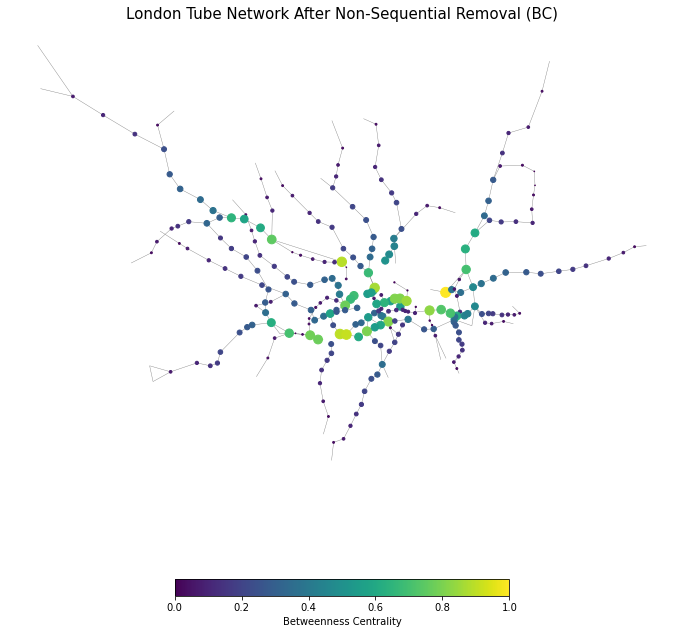

<Figure size 432x288 with 0 Axes>

In [19]:
# plot
betweenness_w_values=[(i[1]['betweenness_w']) for i in g_shp_un.nodes(data=True)]

bet_w_color=[(i[1]['betweenness_w']/max(betweenness_w_values)) for i in g_shp_un.nodes(data=True)]
bet_w_size=[(i[1]['betweenness_w']/max(betweenness_w_values)*100) for i in g_shp_un.nodes(data=True)]


pos_shp = {xy: xy for xy in g_shp.nodes()}
pos=pos_shp

fig, ax = plt.subplots(figsize=(12,12))


nx.draw_networkx_edges(g_shp_un, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(g_shp_un,
        pos = pos,
        node_color= bet_w_color,
        node_size= bet_w_size)

plt.colorbar(nod,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London Tube Network After Non-Sequential Removal (BC)",fontsize=15)

fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('p1_bc2_nonsq.png', dpi=100)

In [27]:
print(nx.info(g_shp_un))

Name: 
Type: Graph
Number of nodes: 296
Number of edges: 309
Average degree:   2.0878


In [20]:
# Generate connected components and select the largest:
largest_component = max(nx.connected_components(g_shp_un), key=len)

# Create a subgraph of G consisting only of this component:
G2 = g_shp_un.subgraph(largest_component)

In [21]:
components = [len(c) for c in sorted(nx.connected_components(g_shp_un), key=len, reverse=True)]
len(components)

8

In [22]:
print(nx.info(G2))

Name: 
Type: Graph
Number of nodes: 261
Number of edges: 281
Average degree:   2.1533


In [23]:
# 4. unweighted diameter
nx.diameter(G2)

54

In [24]:
# 5. weighted (distance) diameter
nlen = {n:nx.single_source_dijkstra_path_length(G2, n, weight='distance') 
        for n in G2.nodes() }
e = nx.eccentricity(G2,sp=nlen)
d = nx.diameter(G2, e)
d

85249.18995270002

In [25]:
a = nx.global_efficiency(G2)
a

0.08000542719910182

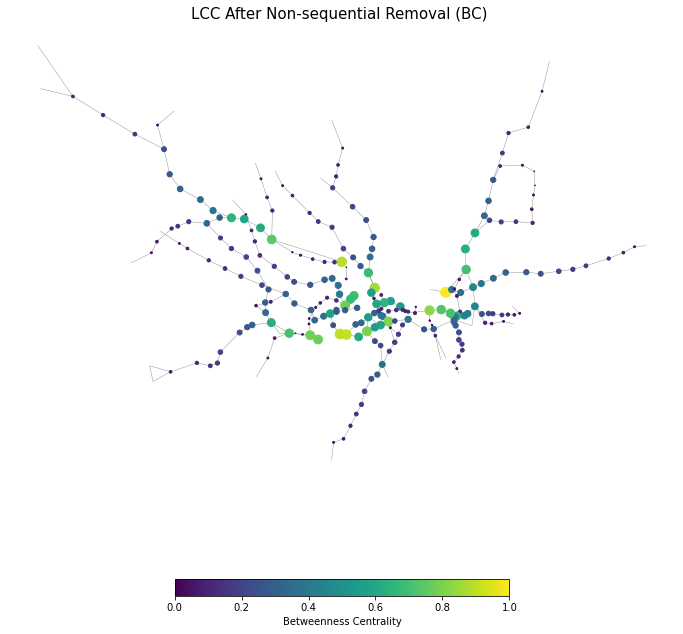

<Figure size 432x288 with 0 Axes>

In [26]:
#Let's compare node centrality for the undirected tube network and the directed commuting flows network:
#Let us compute the betweenness centrality for the undirected tube network
bet_london_t=nx.betweenness_centrality(G2, weight='distance', normalized=False)
# We can add these values as node attributes:
nx.set_node_attributes(G2,bet_london_t,'betweenness_t')

# plot
betweenness_w_values=[(i[1]['betweenness_w']) for i in G2.nodes(data=True)]

bet_w_color=[(i[1]['betweenness_w']/max(betweenness_w_values)) for i in G2.nodes(data=True)]
bet_w_size=[(i[1]['betweenness_w']/max(betweenness_w_values)*100) for i in G2.nodes(data=True)]


pos_shp = {xy: xy for xy in g_shp.nodes()}
pos=pos_shp

fig, ax = plt.subplots(figsize=(12,12))


nx.draw_networkx_edges(G2, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(G2,
        pos = pos,
        node_color= bet_w_color,
        node_size= bet_w_size)

plt.colorbar(nod,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("LCC After Non-sequential Removal (BC) ",fontsize=15)

fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('p1_bc3_nonsq.png', dpi=100)